In [1]:
# Preprocessing
import mglearn

mglearn.plots.plot_scaling()

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1,
                                                    stratify=cancer.target)
print("=========================== Data training before scaling ===============================\n")
print("Shape of X_train before scaling: {}".format(X_train.shape))
print("Per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("=========================== Data Testing before scaling ===============================\n")
print("Shape of X_train before scaling: {}".format(X_test.shape))
print("Per-feature minimum before scaling:\n {}".format(X_test.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_test.max(axis=0)))

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Show
print("=========================== Data training afrer scaling ===============================\n")
print("Shape of X_train after scaling: {}".format(X_train_scaled.shape))
print("Per-feature minimum before scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train_scaled.max(axis=0)))
print("=========================== Data testing afrer scaling ===============================\n")
print("Shape of X_train after scaling: {}".format(X_test_scaled.shape))
print("Per-feature minimum before scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_test_scaled.max(axis=0)))

=========================== Data training before scaling ===============================

Shape of X_train before scaling: (426, 30)
Per-feature minimum before scaling:
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
Per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
=========================== Data Testing before scaling ===============================

Shape of X_train before scaling: (143, 30)
Per-feature minimum before scaling:
 [8.597e+00 9

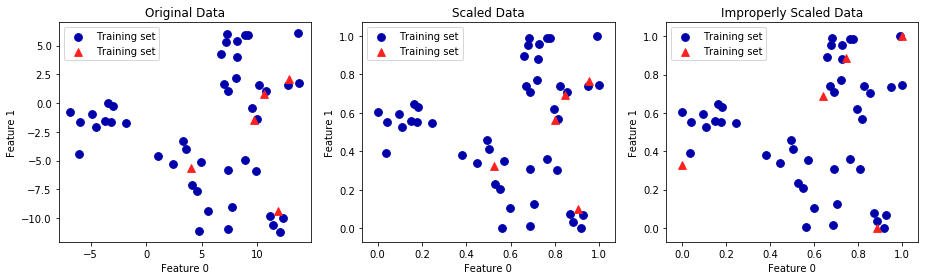

In [3]:
# Scaling Training and test data the same way
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

X, y = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Visualize original data
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=[mglearn.cm2(0)], label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=[mglearn.cm2(1)], label="Training set", s=60)
axes[0].legend(loc='best')
axes[0].set_title('Original Data')

# Visualize scaled data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=[mglearn.cm2(0)], label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=[mglearn.cm2(1)], label="Training set", s=60)
axes[1].legend(loc='best')
axes[1].set_title('Scaled Data')

# Visualize wrongly scaled data
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scale_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=[mglearn.cm2(0)], label="Training set", s=60)
axes[2].scatter(X_test_scale_badly[:, 0], X_test_scale_badly[:, 1], marker='^', c=[mglearn.cm2(1)],
                label="Training set", s=60)
axes[2].legend(loc='best')
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [4]:
# The effect of preprocessing on supervised learning
print("================ MinMaxScaler =================\n")
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("Test set accuracy before scaling data: {:.2f}".format(svm.score(X_test, y_test)))
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("Test set accuracy after scaling data: {:.2f}".format(svm.score(X_test_scaled, y_test)))
from sklearn.preprocessing import StandardScaler
print("\n=============== StandardScaler ================\n")
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("Test set accuracy before scaling data: {:.2f}".format(svm.score(X_test, y_test)))
print("Test set accuracy after scaling data: {:.2f}".format(svm.score(X_test_scaled, y_test)))

================ MinMaxScaler =================

Test set accuracy before scaling data: 0.63
Test set accuracy after scaling data: 0.97

=============== StandardScaler ================

Test set accuracy before scaling data: 0.63
Test set accuracy after scaling data: 0.96


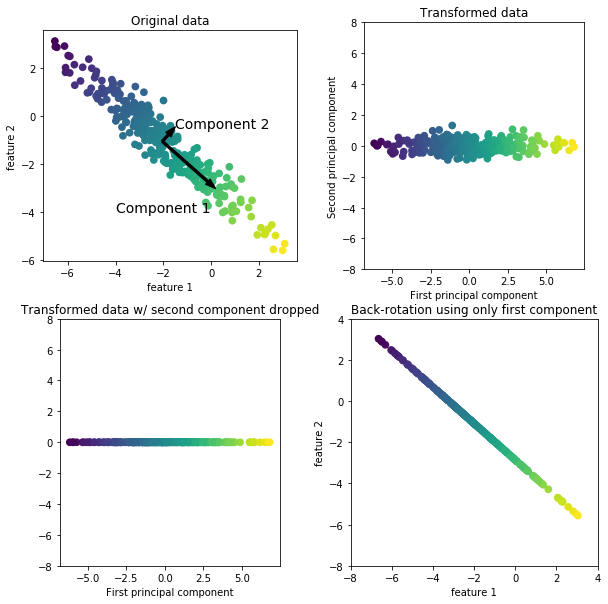

In [5]:
# Principal Component Analysis (PCA)
# Illustration
mglearn.plots.plot_pca_illustration()

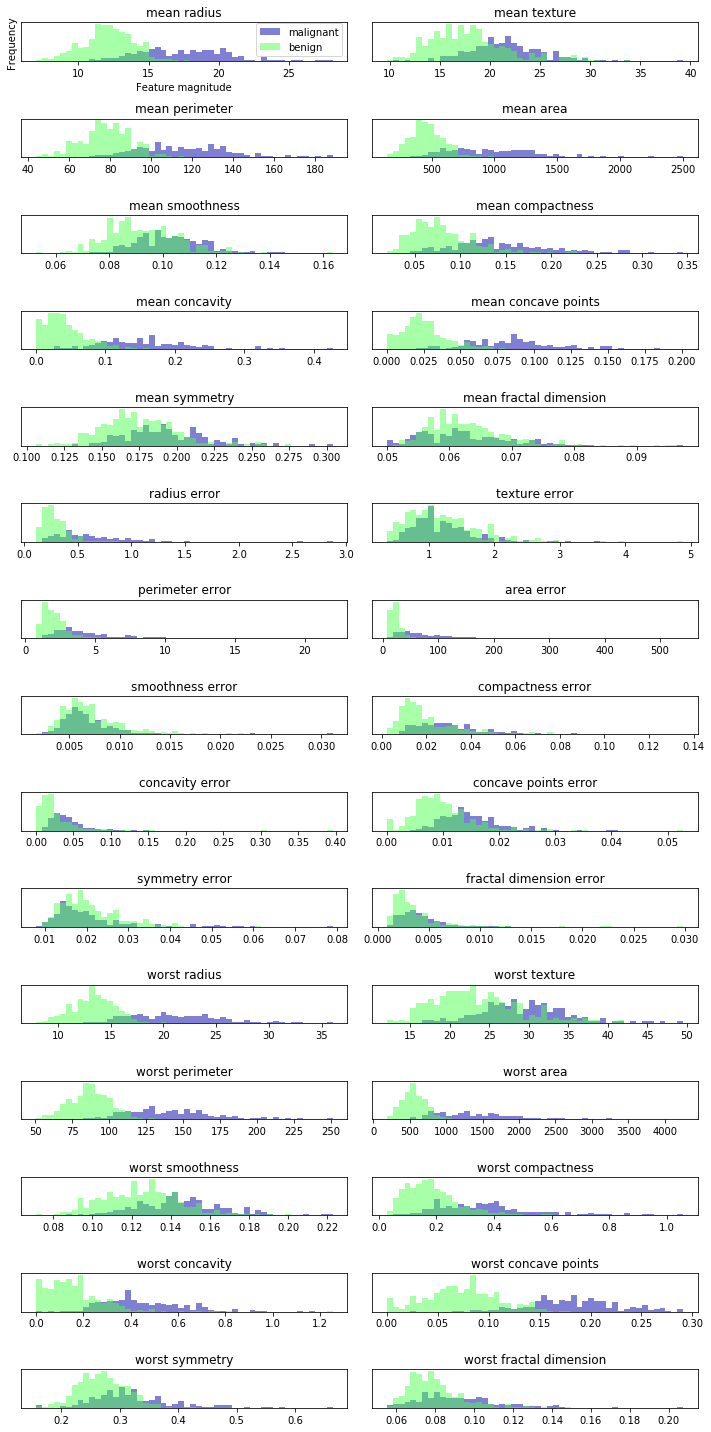

In [6]:
# Show histogram of feature of cancer datasets
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Original shape: (569, 30)
Reduce shape: (569, 2)
PCA component shape: (2, 30)
PCA components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


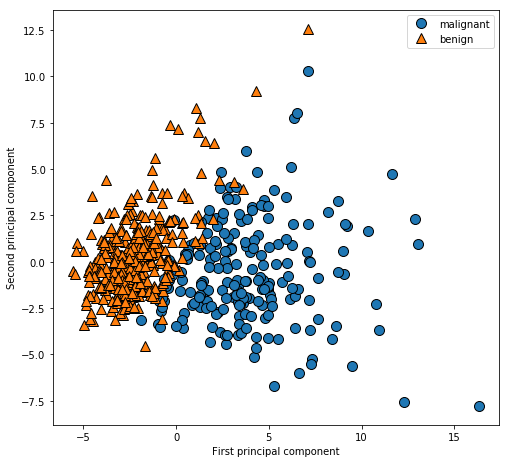

In [7]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(X_scaled.shape))
print("Reduce shape: {}".format(X_pca.shape))

# Visualize PCA
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n {}".format(pca.components_))

Text(0, 0.5, 'Principal components')

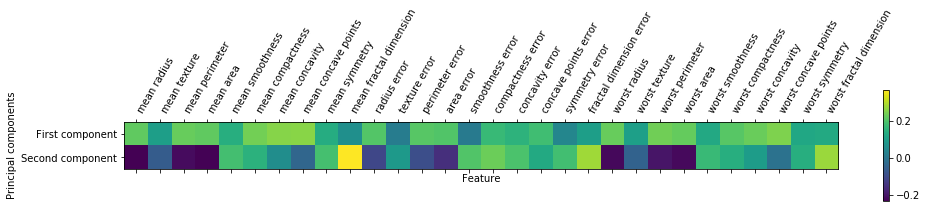

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

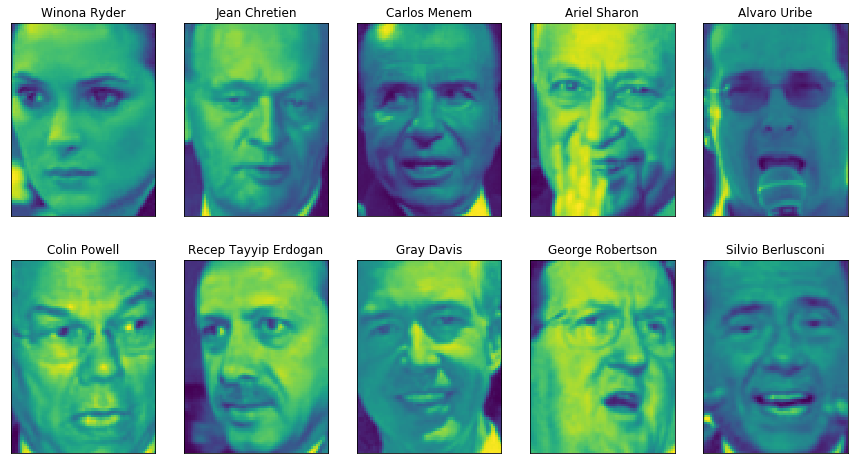

In [9]:
# Feature extraction
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(people['DESCR'])

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
print("===============================================\n")
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

In [10]:
# Count how often each target appears
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='          ')
    if (i+1)%3 == 0: # Enter
        print()

Alejandro Toledo           39          Alvaro Uribe               35          Amelie Mauresmo            21          
Andre Agassi               36          Angelina Jolie             20          Ariel Sharon               77          
Arnold Schwarzenegger      42          Atal Bihari Vajpayee       24          Bill Clinton               29          
Carlos Menem               21          Colin Powell              236          David Beckham              31          
Donald Rumsfeld           121          George Robertson           22          George W Bush             530          
Gerhard Schroeder         109          Gloria Macapagal Arroyo    44          Gray Davis                 26          
Guillermo Coria            30          Hamid Karzai               22          Hans Blix                  39          
Hugo Chavez                71          Igor Ivanov                20          Jack Straw                 28          
Jacques Chirac             52          Jean Chretien    

In [11]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255;

from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [12]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca shape: {}".format(X_train_pca.shape))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("pca.components_.shape: {}".format(pca.components_.shape))

X_train_pca shape: (1547, 100)
Test set accuracy: 0.31
pca.components_.shape: (100, 5655)


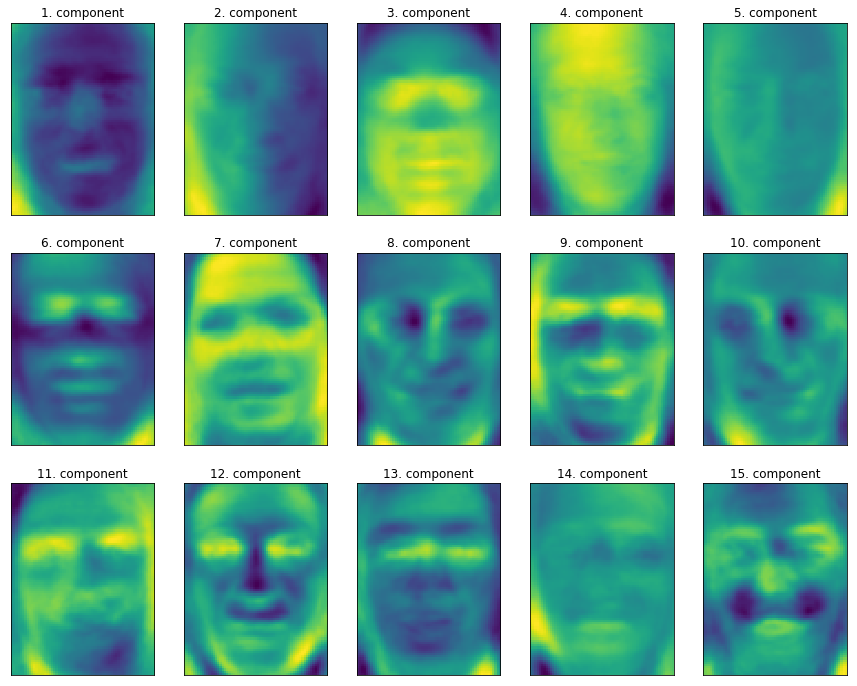

In [23]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format(i + 1))

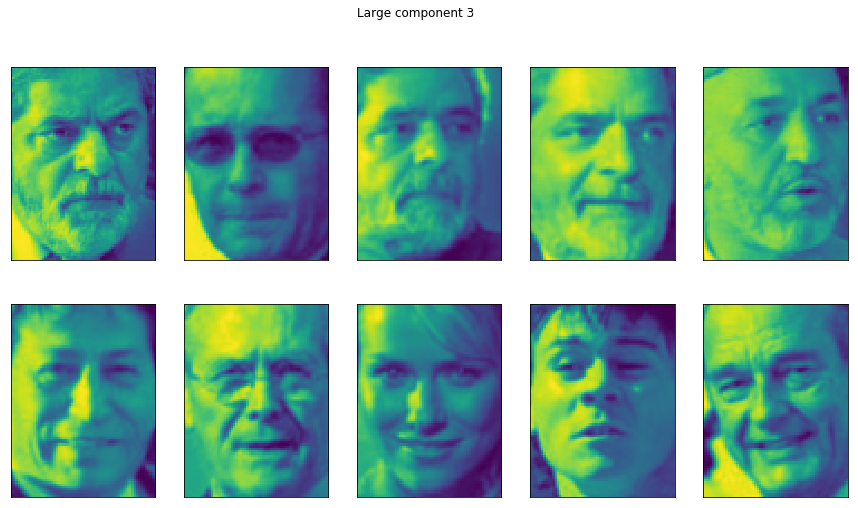

In [41]:
compn = 1
inds = np.argsort(X_train_pca[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

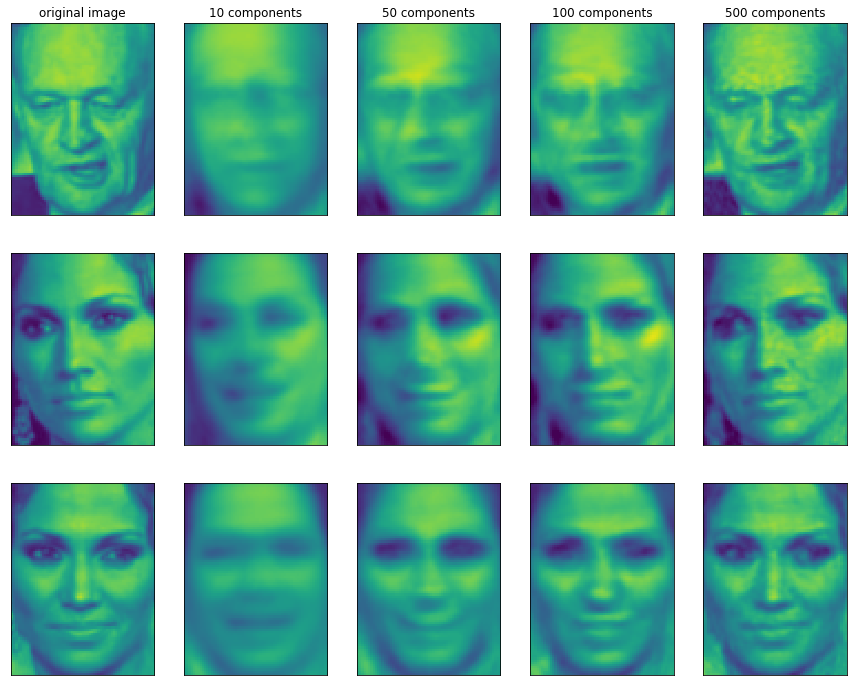

In [14]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

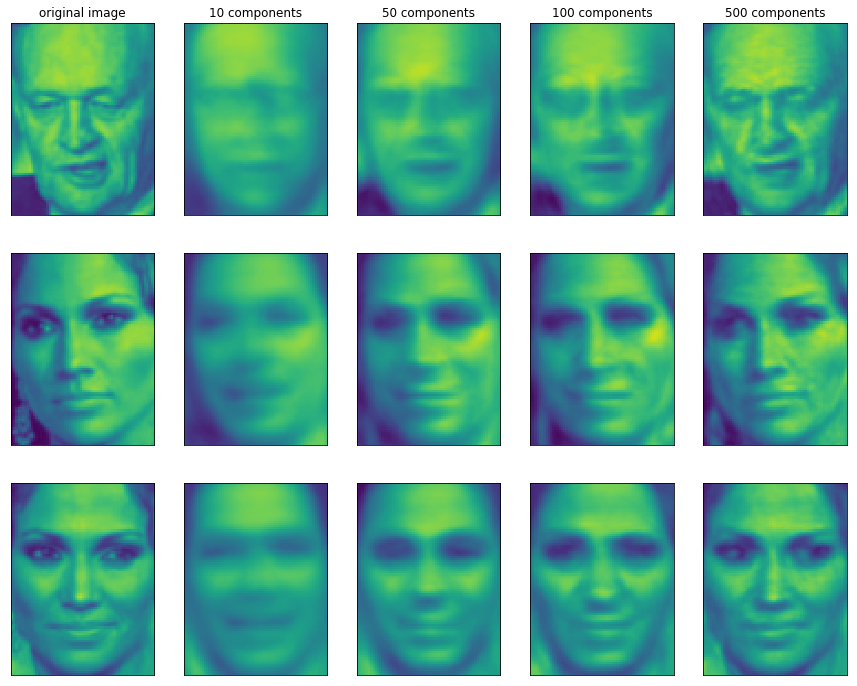

In [15]:
# Non-negative Matrix Factorization
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

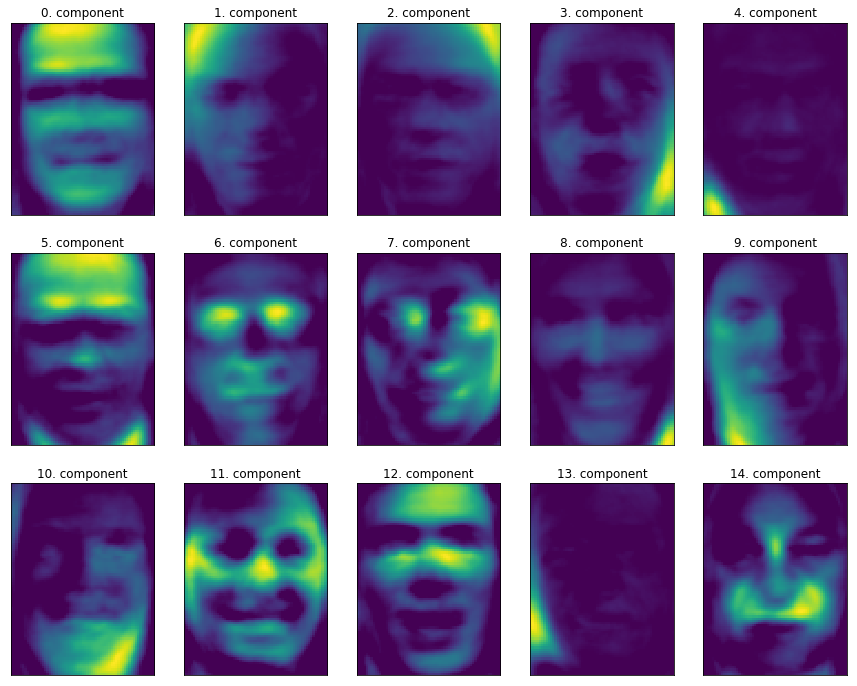

In [55]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

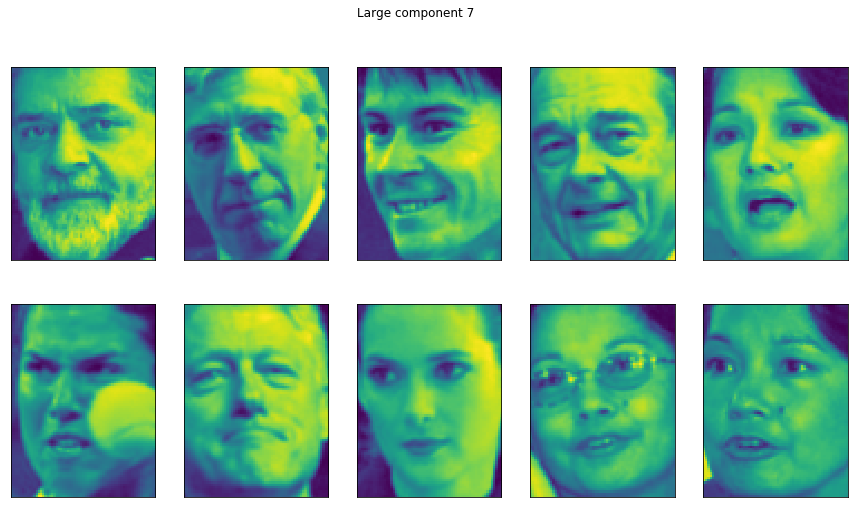

In [62]:
# Faces that have a large coefficient for component 7
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 7")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Shape of S: (2000, 3)


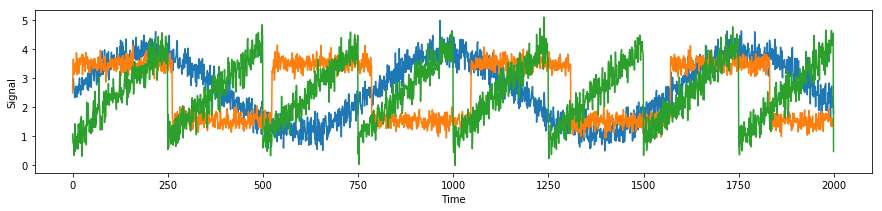

In [74]:
# Signal that is a combination of three different sources
S = mglearn.datasets.make_signals()
plt.figure(figsize=(15, 3))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
print("Shape of S: {}".format(S.shape))

In [72]:
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [95]:
# Non-negative Matrix Factorization
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape by NMF: {}".format(S_.shape))
# Principal Components Analysis
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("Recovered signal shape by PCA: {}".format(H.shape))

Recovered signal shape by NMF: (2000, 3)
Recovered signal shape by PCA: (2000, 3)


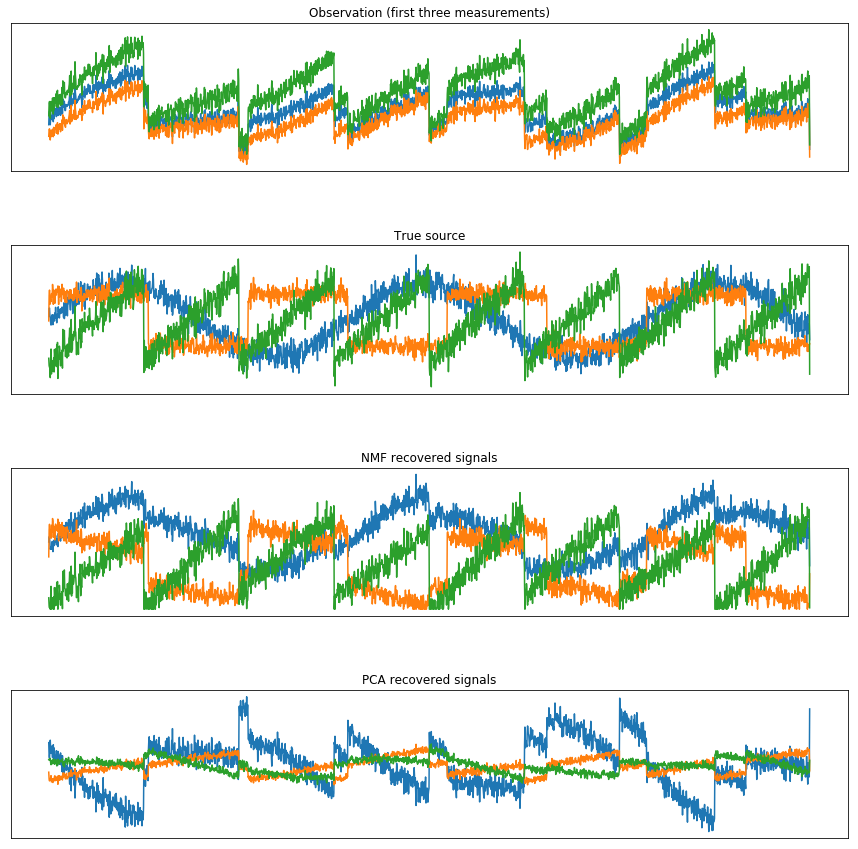

In [97]:
models = [X, S, S_, H]
names = ['Observation (first three measurements)',
         'True source',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(15, 15), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

Shape of digits: (1797, 64)


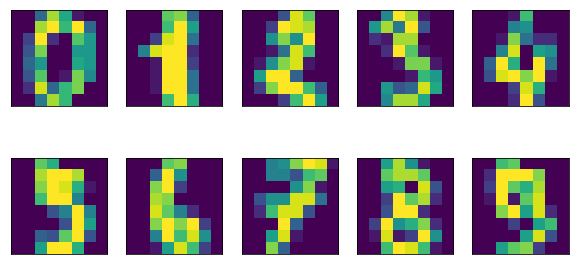

In [103]:
# Manifold Learning with t-SNE
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
print("Shape of digits: {}".format(digits.data.shape))

Text(0, 0.5, 'Second principal component')

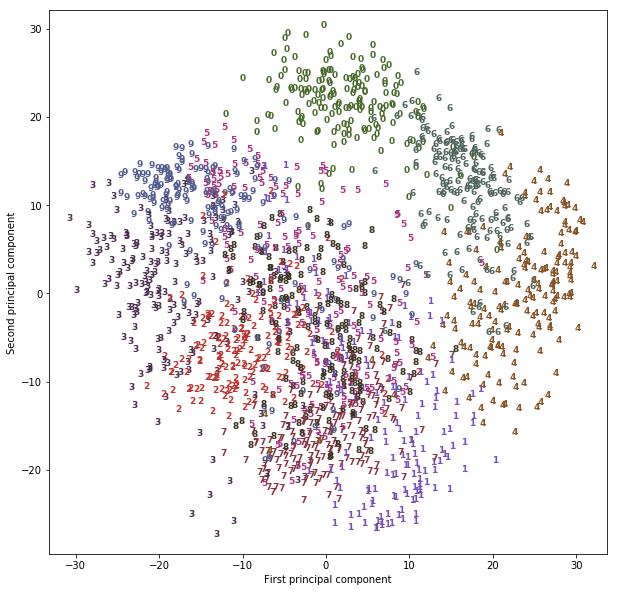

In [108]:
# Build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min() - 2, digits_pca[:, 0].max() + 2)
plt.ylim(digits_pca[:, 1].min() - 2, digits_pca[:, 1].max() + 2)

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': '9'})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 't-SNE feature 1')

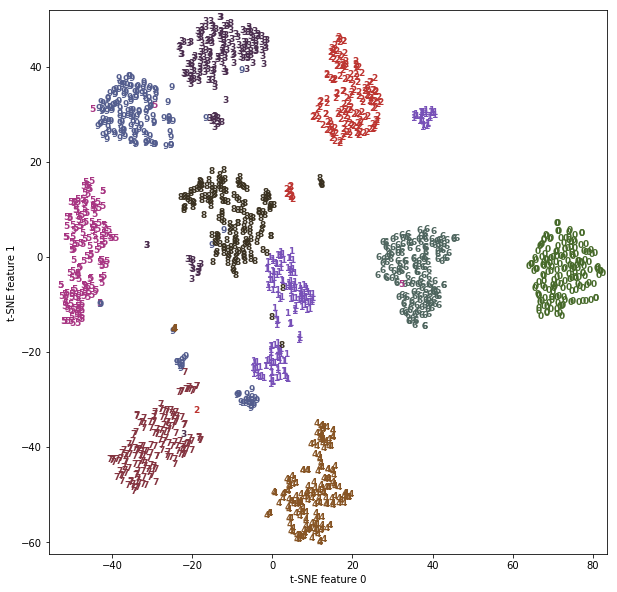

In [112]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)

digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min() - 2, digits_tsne[:, 0].max() + 2)
plt.ylim(digits_tsne[:, 1].min() - 2, digits_tsne[:, 1].max() + 2)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': '9'})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")